In [1]:
#help function


In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math
from mpl_toolkits.mplot3d import Axes3D
from random import random
#from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

<h1> Linear Regression </h1>
<div class='legend'>
<ul style="margin-left: 30px">
      <li>1.0  <a href='#simple~linear~regression'>Simple Linear Regression </a> </li> 
      <li>1.1 <a href='#fitting~reg'> Fitting the regresion line</a> </li> <br>
      <li>1.2 <a href='#grad~sim~linear'>Gradient Descent over simple linear regression</a> </li>
      <li>1.3 <a href='#effect~learning~rate'>Effect of different values for learning rate</a> </li>
      <li>1.4 <a href='#m-linear-r'>Multiple Linear Regression</a> </li>
      <li>1.5 <a href='#reg'>Regularization of gradient descent by learning rate and max iterations</a> </li>    
      <li>1.6 <a href='#conclusion'>Conclusion</a> </li>
</ul> 
</div>    
 

In statistic, LA is an linear approach to modeling the realationship between  one or more explanatory variables (independent or dependent).The case of one explanatory variable is  called  Simple Linear Regression for  more then one is called Multiple Linear Regression.In Linear Regression the relationships are modeled using <a href='https://en.wikipedia.org/wiki/Linear_predictor_function'> linear predictors function </a> whose unknown parameters are estimated from data.

<h2 id='simple~linear~regression'> Simple linear regression </h2>

Simple Linear regression has a single explanatory variable.It concerns two-dimensional sample points with one dependent and one independent variable. (Conventionally x and y data point in Cartesian coordinate system).The adjective simple refers to the fact that the outcome variable is related to a single predictor.

<h2 href='fitting~reg'> Fitting the regression line with  least-squared </h2>


Consider the model function $y = \alpha + \beta x$ which describes a line with slope $\beta$ and intercept $\alpha$. <br>
example : let $\alpha=7$ and $\beta=3$, geometrically $y = 7 + 3 x$ appears to be as below graphic.

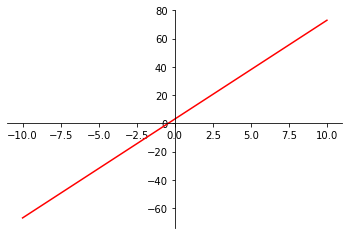

In [3]:
x = np.linspace(-10,10)
y = 7*x + 3
#plt.scatter(x,y)
plt.plot(x,y,color='r')
set_spines()


Suppose we observe $n$ data pairs denoted with $(x_i,y_i), i = 1,2,...,n$.

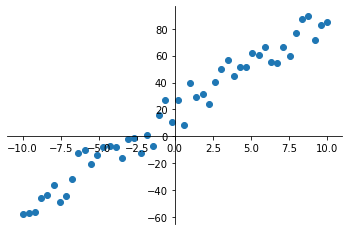

In [4]:
f = lambda x : 7*x + 3 + np.random.uniform(0,30)
y =[f(i) for i in x]
plt.scatter(x,y)
set_spines()

We can describe the underlying relationship between $y_i$ and $x_i$ invloving the error term $\varepsilon_i$ in linear equation $y_i =  \alpha + \beta x_i + \varepsilon_i $.The  $\varepsilon_i$  could be intepreted as the noise of the data or in some sense some type of randomness originated from various reasons.Also it is know as 'error term' or 'residual'.
Our target is to find estimated values $\alpha$ and $\beta$ which would provide the best fit in some sense for data points.
In order to find the 'best' fit we will use the <a href='https://en.wikipedia.org/wiki/Ordinary_least_squares'>least-squared</a> approach.From  mathematical view point the issue involved the minimization of Lost function respect to $\alpha,\beta$. 
 $$1)  L = \sum_i(y_i - \alpha - \beta x_i)^2$$.
$L$ is called $Lost$ function the expression $(y_i - \alpha - \beta x_i)^2$ is called $Lost$ function.This function is appropiative because of It is a diferencianal everywhere and gives us  a measure of diference between dependent value $y_i$ and predicted value of $y'(\alpha,\beta)=\alpha + \beta x_i $.<br>
In order to find $min_{\alpha,\beta}L(\alpha,\beta,x_i,_yi)$ we will use Gradient Descent method.<br>

<h2 id='grad~sim~linear'>1. Gradient Descent over simple linear regression</h2>

The methods for finding the maximum and minumum (extrema) have been created with developing of mathematical analysis(calculus).Gradient Descent is numerical approach to local minumum of first-oreder differentiable function.The idea is to take repeaded steps on the oposite direction of the gradient the function in current point. 


Our pupose is to find the value of $x$ where the function gets the minumum value.
The GD algorithm is difined by : 
  $$\alpha = \alpha - \nabla_{\alpha}L(\alpha,\beta)*h$$
  $$\beta = \beta - \nabla_{\beta}L(\alpha,\beta)*h$$ <br>
  
where $h$ is called <mark>Learning rate</mark> or step size.
Applying GD algorithm over our lost function 1) we will get : <br> <br>
$$\nabla_{\alpha}(J(a,b)=\frac{\partial{L}}{\partial{{\alpha}}}=\frac{\partial{\sum_i(y_i - \alpha - \beta x_i)^2}}{\partial{{\alpha}}}=-\frac{2}{n}\sum_{n=1}^{n}{(y_i-a*x_i - b)*x_i} $$ <br>
$$\nabla_{\beta}(J(a,b)=\frac{\partial{L}}{\partial{{\beta }}}=\frac{\partial{\sum_i(y_i - \alpha - \beta x_i)^2}}{\partial{{\beta}}}=- \frac{2}{n}\sum_{n=1}^{n}{(y_i-a*x_i - b)} $$ <br> <br>
applying above to gradient descent forumula related to simple linear regression we achieved : 
 $$\alpha = \alpha + \frac{2}{n}\sum_{n=1}^{n}{(y_i-a*x_i - b)*x_i}*h$$
  $$\beta = \beta +\frac{2}{n}\sum_{n=1}^{n}{(y_i-a*x_i - b)}*h$$ <br>

The above equations are performed enough times to reach the minimum of Lost function with conditional that we have chosen the appropriate Learning rate $h$.

In [5]:
#implementation cost function
def lost(X,Y,alpha,betta):
    '''
    Calculation of cost (error) function of simple linear regression
   
    Parrameters : 
    X(array or number) : X arguments, independent variable
    Y (array or number) : Y arguments, actual dependent variable 
    Returns :
      number of cost function
  '''
   
    return np.sum((Y - (alpha - betta*X ))**2 )


In [6]:
def gradient_descent(X,Y,C=0.1,E=100):
    '''
    
    Calculation of cost (error) function of simple linear regression
   
    Parrameters : 
    X(array or number) : X arguments, independent variable
    Y (array or number) : Y arguments, actual dependent variable 
    C (number) :  learning rate
    I(int) : number of iteration(Epoch)
    Returns :
      number of cost function
   '''
   
    a = 30
    b = 10 
    a_args = []
    b_args = []
    n = X.size
  
    for i in range(E):
        a = a + 2/n*(np.sum((Y - a*X - b)*X))*C
        b =  b + 2/n*(np.sum((Y - a*X -b)))*C
        a_args.append(a)
        b_args.append(b)
    return a,b,a_args,b_args 

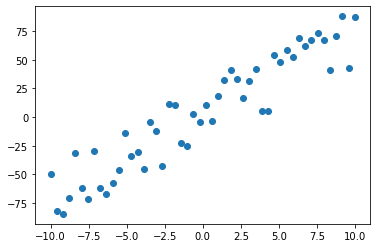

In [7]:
x = np.linspace(-10,10)
f = lambda x : 7*x + 3 + np.random.uniform(-30,30)
y =[f(i) for i in x]
plt.scatter(x,y)

Let to apply gradient descent of above points.

In [8]:
a,b,a_r,b_r = gradient_descent(x,y,C=0.01,E=1000)

(7.766000725288746, 3.736419450237377)

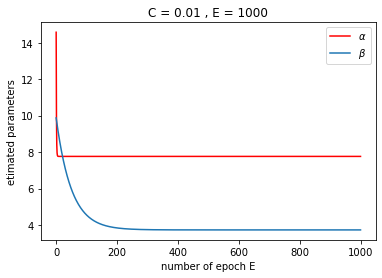

In [9]:
plt.plot(a_r,color='r',label=r'$\alpha $')
plt.plot(b_r,label=r'$\beta$')
plt.xlabel("number of epoch E")
plt.ylabel("etimated parameters")
plt.title('C = 0.01 , E = 1000')
plt.legend()
a,b


From graphics we can see that the curves tend to  result $(\alpha = 6.6603, \beta =4.431)$.
<br> 
The fit line will be : 

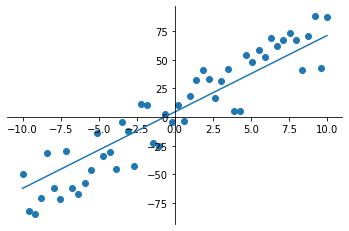

In [10]:
#7.047696929660597, 1.081292922517757
plt.scatter(x,y)  #7.892385161777225, 5.6459662769234535
plt.plot(x,6.6603*x +  4.431)
set_spines()

It seems to be somehow approriative line wich discribe the data well, but our origin values of $$ are $(\alpha = 7, \beta = 1)$   not $(\alpha = 6.6603, \beta = 4.431)$.In below we will examine how will chaged the $(\alpha,\beta)$ resprect to different Learnig rate $C$ and nuber of epoch E(itarations).

 <h2 href='effect~learning~rate'>1.3  Effect of different values for learning rate </h2>

The Learning rate C is the tunning parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum of cost function.While the gradient direction is usually determined from the gradient of the cost function, the learning rate determines how big a step is taken in that direction.The too hight learning rate will make  the learning jump  over minima but too low leaning rate will either take too long to converge or get stuck in an undesirable local minimum.In order to achieve faster convergence, prevent oscillations and getting stuck in undesirable local minima the learning rate is often varied during training either in accordance to a learning rate schedule or by using an adaptive learning rate

let's apply different learnning rate to our example:


(7.787550419803599, 8.864604443160086)

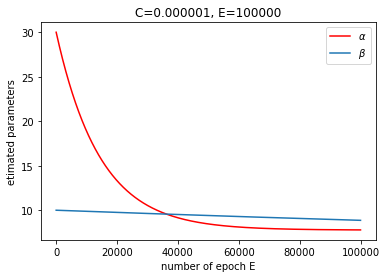

In [11]:
a,b,a_r,b_r = gradient_descent(x,y,C=0.000001,E=100000)
plt.plot(a_r,color='r',label=r'$\alpha $')
plt.plot(b_r,label=r'$\beta$')
plt.xlabel("number of epoch E")
plt.ylabel("etimated parameters")
plt.title('C=0.000001, E=100000')
plt.legend()
a,b

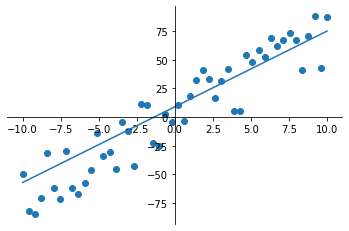

In [12]:
plt.scatter(x,y) 
plt.plot(x,6.6*x + 8.9)
set_spines()

When the data is too big, The decreasing of learning rate can lead to enormous time execution,but in above the result is satisfying too.

(6.99604135206744e+184, -4.272584466841102e+169)

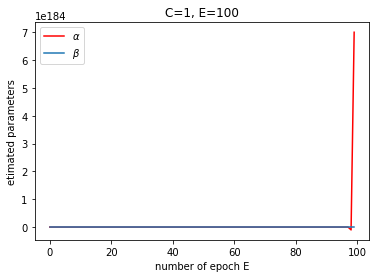

In [13]:
a,b,a_r,b_r = gradient_descent(x,y,C=1,E=100)
plt.plot(a_r,color='r',label=r'$\alpha $')
plt.plot(b_r,label=r'$\beta$')
plt.xlabel("number of epoch E")
plt.ylabel("etimated parameters")
plt.title('C=1, E=100')
plt.legend()
a,b

The result is extremely bad. In this case, the learning has made a learning jump, therefore the result is run away from minima.

<h1 id='m-linear-r'>2. Multiple Linear Regression</h1>

Multiple Linear Regression also known as multiple regression, is a statistical technique that uses several explanatory variable to predict the outcome of response variable.In essence, MLR is an extension of ordinary least-squared regression.The equation that we are searching for is defined by : <br> <br>
$$\hat{ y}^i= h(x{^i}) =  \vartheta_0 + \vartheta_1 x^i_{1} + \vartheta_2 x_{2}^i+ ...\vartheta_p x_{p}^i  $$
<br> <br>
where , $i$ is number of obeservation,
$y_i$ dependet(target) value,
$x_p $ feature values,
$\vartheta_0$ intercept,
$\vartheta_{p}$ slope coeff. for each explanority var. ,


The above hypotesis can also be represented by  
 $$\hat{Y} = X\Theta^T$$ <br> <br>
 where $ \Theta =\begin{bmatrix}
\vartheta_0\\
\vdots \\
\vartheta_p \\
\end{bmatrix}$ $X = \begin{bmatrix} 
1 &x_1^1 & x_1^2 & x_1^n \\
\vdots & \ddots & \vdots & \vdots \\
1& x_p^1 & \dots & x_p^n \\
\end{bmatrix} $ and $\hat{Y} = \begin{bmatrix}
\hat{y}^0\\
\vdots \\
\hat{y}^p \\
\end{bmatrix}$
<br> <br>
we've append column $\hat{Y} = \begin{bmatrix}
1\\
\vdots \\
1\\
\end{bmatrix}$ to $X$ in order to be used in matrix multiplication directly.

To define and measure the error of our model we define the cost function as the sum of the squares of the residuals. The cost function is denoted by :
    $$3)\hspace{1cm} J(\varTheta) = \frac{1}{2m}\sum_{i=0}^m(h(x^i) - y^i)^2 $$

We have to initialize the model parameter with some random values(random initialization).To use Gradient Descent we need to measure how the cost function changes with change in it's parametes.Therefore we compute the partial derivatives of cost finction $4)\hspace{1cm}  J(\vartheta_0,\vartheta_1,...,\vartheta_n)$ <br> <br>
$$ \frac{\partial{J(\varTheta)}}{\partial{\theta_j}} = \frac{1}{m}\sum_{i=0}^m(h(x^i) - y^i)x_j^i$$
In more compatable form using matrix in order to be implemnted using <mark>NUMPY</mark>


Using the <a href='https://en.wikipedia.org/wiki/Einstein_notation' > Eistein notaion </a> we can rewrite eq. 4) <br> <br> <br>
$$ \frac{\partial{J(\vartheta_k)}}{\partial{\theta_j}} = \frac{1}{m}(\theta_p x_p^i - y^i)x_j^i $$ in matrix form <br> <br> <br>
 $$5) \hspace{1cm}  \vec{\nabla} J(\varTheta)=((X\Theta^T- Y)^T.X)^T $$ <br> <br>
  applying the rule  $(AB)^T$ the eq can be reformed
   $$6) \hspace{1cm}  \vec{\nabla} J(\varTheta)= X^T(X\Theta^T- Y) $$  <br> <br>
 $$ where  \hspace{1cm} \vec{\nabla} = \frac{\partial}{\partial{\theta_j}\vec{e_j}}$$ <br> <br>

 eq. 6 is extremely comfortable because it can be implemented very simple in <mark>NUMPY</mark> which is many times faster than common Python


The Gradient Descent alg finaly will looks like that : <br>
 $$\theta = \theta - h\vec{\nabla} J(\varTheta) $$ h is learnig rate


Calcaulation of accuracy of Multilinear regression by $R^2$

We will be using Root mean squared error(RMSE) of Determination($R^2$ score)  to evaluate our model.<br>
RMSE is a square root of average of sum of suares of residualas.
RMSE is difined by : <br>
$$ RMSE =\sqrt{\frac{1}{2}\sum_{i=1}^m(h(x^i)- y ^i)} $$
R² score or the coefficient of determination explains how much the total variance of the dependent variable can be reduced by using the least square regression.<br>
$R^2$ is determed by 
    $$R^2 = 1 - \frac{SS_r}{SS_t}$$

SS_t  is the total sum of errors if we take the mean of the observed values as the predicted value.
$$SS_t =\sum_{i=1}^m( y ^i -\bar{y})^2 $$ <Br>
    $$ SS_r =\sum_{i=1}^m(h(x^i)- y ^i)^2 $$

<h2>Implementation of gradient descent for Multiple Linear regression in NUMPY</h2>

In [19]:
class MultipleLinearRegression:
    """
    Multiple Linear regression

    Parameters
    ..........

    C : float
        learning rate
    I : int
        number of iterations (Epochs)
    Attributes
    ..........
     w_ : weights (Predictors)

    """

    def __init__(self, C=0.001, I=50):
        self.C = C
        self.I = I
        self.w_ = None

    def fit(self, X, Y):
        """Fit tthe training data

        Parameters
        ..........

        X : array, shape = [N_samples,n_features]
            Training samples
        Y  : array, shape = [n_samples, n_target_values]

        Returns
        .......
        self : object

        """

        X, Y = self._validate(X, Y)
        self.w_ = np.ones((X.shape[1], 1))  # inicialized predictors
        M = X.shape[0]  # numbers of samples
        for _ in range(self.I):
            self.w_ =self.w_ -  self.C * (1 / M) * X.T.dot((X.dot(self.w_) - Y))
            #self.w -= self.C * (1 / M) * X.T.dot((X.dot(self.w) - Y))


        return self

    def predict(self, x):
        """ Predicts the value after the model has been trained.
        Parameters
        ----------
        x : array-like, shape = [n_samples, n_features]
            Test samples
        Returns
        -------
        Predicted value
        """
        x = np.append(np.ones((x.shape[0], 1)), x, axis=1)
        return np.dot(x, self.w_)

    def score(self,X, Y):
        """Calculation of accuracy using (R^2 score)
             x : array-like, shape = [n_samples, n_features]
             y : array-like, shape = [n_samples, n_features]
            Test samples
        Returns
        float : score
        -------
        Predicted value

        """
        #X = np.append(np.ones((X.shape[0], 1)), X, axis=1)
        #Y = np.array(Y).reshape(X.shape[0], 1)
        X,Y = self._validate(X,Y)
        y_prime = np.dot(X, self.w_)
        ssr = np.sum((y_prime - Y) ** 2)
        sst = np.sum((Y - np.mean(y_prime)) ** 2)
        r2_score = 1 - (ssr / sst)
        return r2_score
    
    def _validate(self,X,y):
        '''Added tow with one number to X data
        reshape Y data


        :param X: array-like, shape = [n_samples, n_features]
        :param y: array-like, shape = [n_samples, n_target_values]
        :return: validated X,Y
        '''
        return   np.append(np.ones((X.shape[0], 1)), X, axis=1),\
                 np.array(y).reshape(y.shape[0], 1)

We will test our implementation over insurence.csv data set



In [21]:
df = pd.read_csv("../../../resources/data/insurance.csv")  
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Converting Categories to Numbers. The linear regression can be performed only on numbers, so we should convert these categorical features into numbers. To do that, we can make use of a function called get_dummies.
So let’s convert the “sex,” “smoker,” and “region” columns into numerically represented features.

In [22]:
cols = ['sex', 'smoker', 'region']
new_df = pd.get_dummies(df, cols, drop_first= True)
new_df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


Now, let’s only select the features that are the most relevant.
Feature selection is one of the important tasks in any machine learning project. You must know which features are most correlated with the targets (the “charges” column in our case) and must only use those features that have a high correlation with your target.
This can be done through experimentation.
For example, in this problem, I tried using the “sex” and “region” features to predict “charges” but didn’t find much of an improvement in the prediction performance of the model.
So I decided to omit these features from the model.
Through small experimentation like that, I found the “age,” “bmi,” and “smoker” columns to be most relevant when predicting insurance costs (the “charges” column in our data frame).


In [24]:
X = new_df[['age', 'bmi', 'smoker_yes']]
y = new_df['charges']

We will perfomr standarlization over X 

In [28]:
scaler = StandardScaler()

In [29]:
X = scaler.fit_transform(X)

Splliting data to Train and Test

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

End let to train the data using our implementation

In [32]:
model =  MultipleLinearRegression(C=0.01,I=1000)
z = model.fit(X_train,y_train)

In [37]:
model.score(X_test,y_test

0.7323173758003395

We've achived according to 𝑅2  score 73% accuracy

Let see how will be in standart LinearRegresion in sklearn in Python

In [41]:
lr = LinearRegression(fit_intercept=True)
lr.fit(X_train,y_train)

LinearRegression()

In [42]:
lr.score(X_test,y_test)

0.7322470193784116

The score using imprlemntation in sklearn in Python is the same as our implementation , Let to compare  the  predicted valuea

In [92]:
our_predicted_data = model.predict(X_test)[:,0]
python_predicted_data = lr.predict(X_test)
pd.DataFrame(our_predicted_data ,python_predicted_data  )

,0
26963.233582,26962.539696
32466.037854,32465.293221
16386.515466,16386.117349
10313.491299,10312.927540
4554.159257,4553.882338
...,...
6066.659315,6066.487660
1301.918644,1301.573708
9178.571257,9178.181162
6629.357965,6629.146516


The diferences is too small,but we can perform $R^2 score$ over the both Python and Our predicted  data  

In [93]:
ssr = np.sum((our_predicted_data - python_predicted_data) ** 2)
sst = np.sum((our_predicted_data - np.mean(python_predicted_data)) ** 2)
r2_score = 1 - (ssr / sst)
r2_score

0.9999999976969305

0.9999999976969305 shows that the difference is negligible